<a href="https://colab.research.google.com/github/Soham101003/pytorch_turtorial_yt/blob/main/simple_neural_network_with_pytorch_lec5_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#create a class that inherits nn.module
class Model((nn.Module)):
  #input layer will have 4 features of the flower which would send it to the hidden layer and then will produce the output
  #constructor
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__() #instantiate the nn.module
    self.fc1=nn.Linear(in_features,h1) #fully_connected_1
    self.fc2=nn.Linear(h1,h2) #fully_connected_2
    self.out=nn.Linear(h2,out_features) #output_layer

#forward propagation layer
  def forward(self,x):

    # x is the input to each layer
    x=F.relu(self.fc1(x)) #pushing into the first layer
    x=F.relu(self.fc2(x)) #pushing into the second layer
    x=self.out(x) #push it into the the output layer

    return x #return the result


In [ ]:
#manual seed for randomization
torch.manual_seed(41)

#instance of model
model=Model()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [ ]:
# prompt: load the iris dataset

import pandas as pd

# Load the Iris dataset from a URL (replace with the actual URL if needed)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(url, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris['species']=iris['species'].replace('Iris-setosa',0.0)
iris['species']=iris['species'].replace('Iris-virginica',1.0)
iris['species']=iris['species'].replace('Iris-versicolor',2.0)

iris  #converting categorical to numerical data

<ipython-input-7-c89efbf2e9d2>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris['species']=iris['species'].replace('Iris-versicolor',2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1.0
146,6.3,2.5,5.0,1.9,1.0
147,6.5,3.0,5.2,2.0,1.0
148,6.2,3.4,5.4,2.3,1.0


In [ ]:
#train test split
X=iris.drop('species',axis=1).values
y=iris['species'].values

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [ ]:
#converting to FloatTensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [ ]:
#criteria of the model to set the error
criterion=nn.CrossEntropyLoss()
#optimizers as Adam and setting learning rate (lr)
optimizer=torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [ ]:
#training the model
epochs=200
losses=[]
for i in range(epochs):
  #making a prediction
  y_pred=model.forward(X_train)
  #tracking our losses
  loss=criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())

  if i%10==0:
    print(f'Epoch:{i} Loss:{loss}')



    #backpropagation: This decreases the loss
    optimizer.zero_grad() #clear any existing gradients
    loss.backward() #calculate new gradients
    optimizer.step() # update the model's parameters with new gradients

Epoch:0 Loss:1.1397022008895874
Epoch:10 Loss:1.1253167390823364
Epoch:20 Loss:1.1137295961380005
Epoch:30 Loss:1.1042349338531494
Epoch:40 Loss:1.095837950706482
Epoch:50 Loss:1.088480830192566
Epoch:60 Loss:1.081663966178894
Epoch:70 Loss:1.0750091075897217
Epoch:80 Loss:1.0683549642562866
Epoch:90 Loss:1.0616358518600464
Epoch:100 Loss:1.0544100999832153
Epoch:110 Loss:1.046653151512146
Epoch:120 Loss:1.037955641746521
Epoch:130 Loss:1.0282665491104126
Epoch:140 Loss:1.0173399448394775
Epoch:150 Loss:1.0048941373825073
Epoch:160 Loss:0.9909484386444092
Epoch:170 Loss:0.9752461910247803
Epoch:180 Loss:0.9577521085739136
Epoch:190 Loss:0.9382714033126831


Text(0, 0.5, 'Loss')

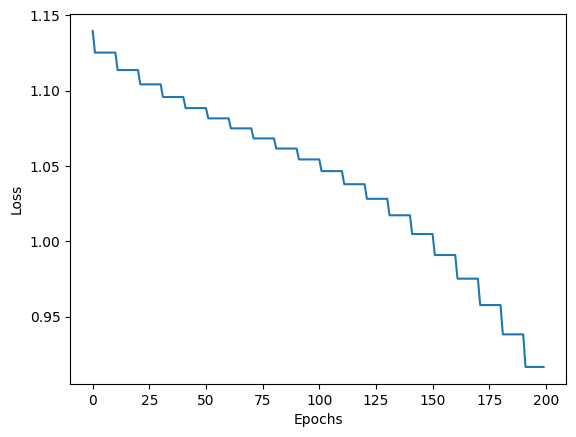

In [ ]:
# ploting the loss

plt.plot(range(epochs),losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
#evaluate the model on test data (validate the model with test data)
with torch.no_grad():
   #turn of backprop
   y_eval=model.forward(X_test) #X_test are feartures from the test set
   loss=criterion(y_eval,y_test)  #Find loss and error


In [ ]:
loss


tensor(0.9412)

In [ ]:
correct=0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val=model.forward(data)


    if y_test[i]==0:
      x='Setosa'
    elif y_test[i]==1:
      x='Virginica'
    else:
      x='Versicolor'




  #print(f'{i+1:2}. {str(data):25} {y_val} {y_test[i]}')
   # print(f'{i+1}.) {str(y_val)} \t {x}' \t {y_val.argmax().item()})     #what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {x} \t {y_val.argmax().item()}')



    #if the predictions are correct or not
    if y_val.argmax().item()==y_test[i]:
      correct+=1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')



1.) tensor([-0.0061,  0.3951,  0.2718]) 	 Virginica 	 1
2.) tensor([-0.1132,  0.4655,  0.3143]) 	 Virginica 	 1
3.) tensor([-0.1595,  0.5022,  0.3946]) 	 Virginica 	 1
4.) tensor([0.0820, 0.3411, 0.2556]) 	 Versicolor 	 1
5.) tensor([-0.0963,  0.4579,  0.3348]) 	 Virginica 	 1
6.) tensor([0.1653, 0.2915, 0.2544]) 	 Versicolor 	 1
7.) tensor([-0.0096,  0.4012,  0.2972]) 	 Virginica 	 1
8.) tensor([0.0723, 0.3475, 0.2562]) 	 Versicolor 	 1
9.) tensor([-0.0583,  0.4326,  0.3139]) 	 Virginica 	 1
10.) tensor([-0.1489,  0.4903,  0.3389]) 	 Virginica 	 1
11.) tensor([-0.0109,  0.4000,  0.2813]) 	 Virginica 	 1
12.) tensor([0.5997, 0.0165, 0.1259]) 	 Setosa 	 0
13.) tensor([0.5836, 0.0224, 0.0992]) 	 Setosa 	 0
14.) tensor([0.2329, 0.2426, 0.1909]) 	 Versicolor 	 1
15.) tensor([0.5306, 0.0606, 0.1473]) 	 Setosa 	 0
16.) tensor([0.0098, 0.3863, 0.2749]) 	 Virginica 	 1
17.) tensor([0.5665, 0.0348, 0.1165]) 	 Setosa 	 0
18.) tensor([-0.0198,  0.4032,  0.2684]) 	 Versicolor 	 1
19.) tensor([0.59

In [ ]:
new_iris=torch.tensor([4.7,4.5,3.2,1.5])

In [ ]:
with torch.no_grad():
  print(model(new_iris))

tensor([0.2180, 0.2500, 0.1662])


In [ ]:
new_iris2=torch.tensor([5.9,3.0,	5.1,	1.8])

with torch.no_grad():
  print(model(new_iris2))

tensor([-0.0445,  0.4185,  0.2708])


In [ ]:
#save and load the NN model for pytorch
torch.save(model.state_dict(), 'model for iris classification.pt')

In [ ]:
#loading the saved model

new_model=Model()
new_model.load_state_dict(torch.load('model for iris classification.pt'))

<ipython-input-50-3e360684abbd>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('model for iris classification.pt'))


<All keys matched successfully>

In [ ]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

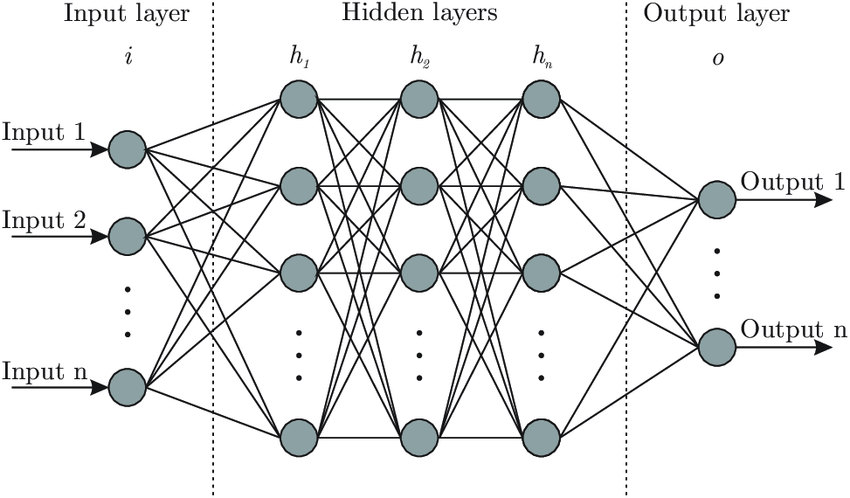

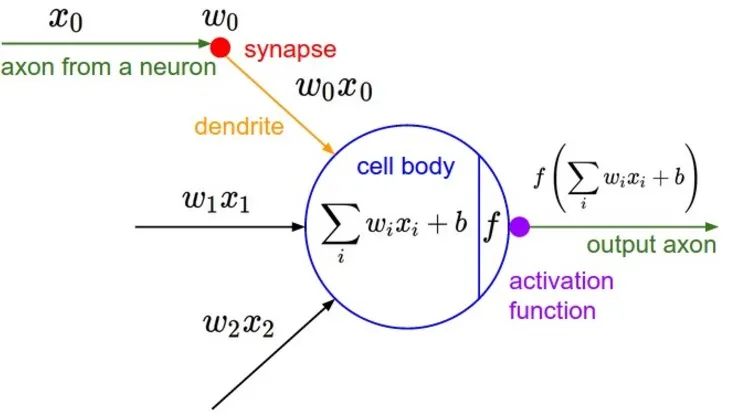